1. Understand the theoretical aspect of ferromagnetic 2D Ising Model

Q1(a)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df_L6 = pd.read_csv('./F_conf_L6.csv', header=None)

In [66]:
df_L8 = pd.read_csv('./F_conf_L8.csv', header=None)

In [67]:
df_L10 = pd.read_csv('./F_conf_L10.csv', header=None)
df_L10

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,-1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,1,1
1,-1,-1,-1,-1,1,1,1,1,1,1,...,1,1,-1,-1,1,1,1,1,-1,-1
2,-1,-1,-1,-1,1,-1,1,1,1,-1,...,1,-1,-1,-1,-1,1,1,1,1,-1
3,1,1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,1,1,-1,-1,-1,-1
4,-1,1,-1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,1,1,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3996,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3997,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3998,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [68]:
df_t = pd.read_csv('./F_temp.csv', header=None)
df_t.columns = ['Temp']
df_t

,Temp
0,4.00
1,4.00
2,4.00
3,4.00
4,4.00
...,...
3995,0.25
3996,0.25
3997,0.25
3998,0.25


In [69]:
df_L6 = pd.concat([df_L6,df_t], axis=1)
df_L8 = pd.concat([df_L8,df_t], axis=1)
df_L10 = pd.concat([df_L10,df_t], axis=1)

In [70]:
df_L6

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Temp
0,-1,1,-1,1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,-1,-1,1,1,-1,4.00
1,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,4.00
2,-1,1,-1,1,-1,-1,-1,1,1,1,...,-1,1,-1,-1,1,-1,1,-1,-1,4.00
3,1,-1,-1,1,1,1,1,-1,-1,-1,...,1,-1,-1,1,1,1,-1,-1,-1,4.00
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,1,1,1,-1,-1,-1,-1,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.25
3996,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.25
3997,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.25
3998,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.25


In [71]:
temp_arr = []
for i in df_t['Temp']:
    if i not in temp_arr:
        temp_arr.append(i)

In [72]:
avg_m_L6 = []
for i in temp_arr:
    spin = df_L6[df_L6['Temp'] == i]
    spin = spin.drop(columns=['Temp'])
    row_sum = spin.sum(axis=1)
    row_sum
    total_m = 0
    for i in row_sum:
        total_m = total_m+abs(i)
    total_m = total_m/36
    avg_m_L6.append(total_m/spin.shape[0])
print(avg_m_L6)


[0.2813333333333333, 0.29044444444444445, 0.34155555555555556, 0.372, 0.44622222222222224, 0.5493333333333333, 0.6811111111111111, 0.816, 0.9131111111111111, 0.9633333333333334, 0.9855555555555555, 0.996, 0.9993333333333334, 1.0, 1.0, 1.0]


In [73]:
avg_m_L8 = []
for i in temp_arr:
    spin = df_L8[df_L8['Temp'] == i]
    spin = spin.drop(columns=['Temp'])
    row_sum = spin.sum(axis=1)
    row_sum
    total_m = 0
    for i in row_sum:
        total_m = total_m+abs(i)
    total_m = total_m/64
    avg_m_L8.append(total_m/spin.shape[0])
print(avg_m_L8)


[0.209875, 0.238125, 0.247875, 0.2995, 0.352375, 0.434, 0.61075, 0.794875, 0.906125, 0.962875, 0.98825, 0.995375, 0.9985, 1.0, 1.0, 1.0]


In [74]:
avg_m_L10 = []
for i in temp_arr:
    spin = df_L10[df_L10['Temp'] == i]
    spin = spin.drop(columns=['Temp'])
    row_sum = spin.sum(axis=1)
    row_sum
    total_m = 0
    for i in row_sum:
        total_m = total_m+abs(i)
    total_m = total_m/100
    avg_m_L10.append(total_m/spin.shape[0])
print(avg_m_L10)


[0.16736, 0.18352000000000002, 0.2048, 0.24303999999999998, 0.27752, 0.38408, 0.53432, 0.79816, 0.9064, 0.96696, 0.98664, 0.99648, 0.9994400000000001, 0.9999199999999999, 1.0, 1.0]


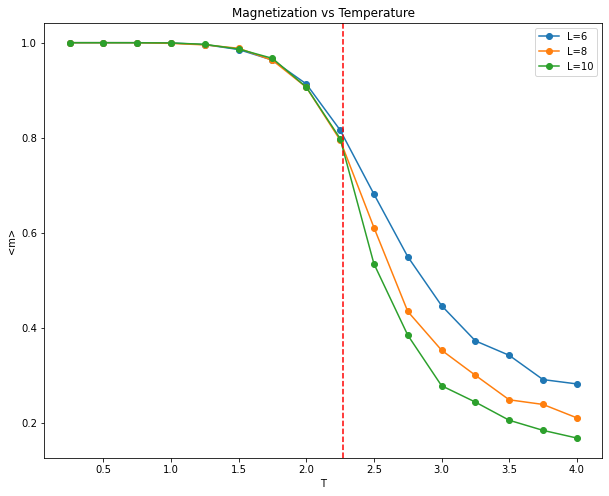

In [75]:
plt.figure(figsize=(10,8))
plt.plot(temp_arr, avg_m_L6, marker='o', label='L=6')
plt.plot(temp_arr, avg_m_L8, marker='o', label='L=8')
plt.plot(temp_arr, avg_m_L10, marker='o', label='L=10')
plt.axvline(x=2.269, c='red', linestyle='--')
plt.xlabel('T')
plt.ylabel('<m>')
plt.title('Magnetization vs Temperature')
plt.legend()

Q1(b)

When the temperature is higher than the critical temperature, the magnetization of the higher size is lower than the magnetization of the lower size. Which means that it is more closer to 0, which align with the theoretical result.(When the size of the system goes to infinity the magnetization will be 0 and the system will become disorder.) And also, when passing the critical temperature the magnetization of the larger size system is lower than the magnetization of the smaller size system. In addition, the magnetization of the larger size system decrease more rapidly when it pass through the critical temeperature, but they still remain a finite value.

2. PCA and Clustering on 2D anti-ferromagnetic Ising model

Q2(a)

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
AF_conf = pd.read_csv('./AF_conf.csv', header=None)
AF_temp = pd.read_csv('./AF_temp.csv', header=None)

In [78]:
AF_conf = AF_conf.to_numpy()
AF_temp = AF_temp.to_numpy()
x = AF_conf
t = AF_temp
t = t.T
print(x)
print(x.shape)
print(t.shape)

[[ 1  1  1 ... -1  1 -1]
 [-1  1 -1 ...  1 -1  1]
 [-1  1  1 ... -1  1 -1]
 ...
 [ 1 -1  1 ...  1 -1  1]
 [ 1 -1  1 ...  1 -1  1]
 [ 1 -1  1 ...  1 -1  1]]
(4800, 100)
(1, 4800)


In [79]:
z = np.zeros((4800,100))
x_mean = np.mean(x,axis=0)
x_std = np.std(x,axis=0,ddof=0)
print(x_mean.shape,x_std.shape)
for i in range(100):
  z[:,i]=(x_mean[i]-x[:,i])/x_std[i]
print(z)
print(z.shape)

(100,) (100,)
[[-0.84225988 -1.21470278 -0.83038903 ...  1.18321596 -1.17614488
   1.17162869]
 [ 1.187282   -1.21470278  1.20425484 ... -0.84515425  0.85023539
  -0.85351273]
 [ 1.187282   -1.21470278 -0.83038903 ...  1.18321596 -1.17614488
   1.17162869]
 ...
 [-0.84225988  0.82324666 -0.83038903 ... -0.84515425  0.85023539
  -0.85351273]
 [-0.84225988  0.82324666 -0.83038903 ... -0.84515425  0.85023539
  -0.85351273]
 [-0.84225988  0.82324666 -0.83038903 ... -0.84515425  0.85023539
  -0.85351273]]
(4800, 100)


In [80]:
cov = np.cov(z,rowvar=False)
print(cov.shape)
print(cov)

(100, 100)
[[ 1.00020838 -0.69752257  0.60750464 ...  0.54728705 -0.57090826
   0.63073777]
 [-0.69752257  1.00020838 -0.71511433 ... -0.55048738  0.5519649
  -0.57430079]
 [ 0.60750464 -0.71511433  1.00020838 ...  0.54328802 -0.53612791
   0.56527334]
 ...
 [ 0.54728705 -0.55048738  0.54328802 ...  1.00020838 -0.69788877
   0.59838511]
 [-0.57090826  0.5519649  -0.53612791 ... -0.69788877  1.00020838
  -0.71417913]
 [ 0.63073777 -0.57430079  0.56527334 ...  0.59838511 -0.71417913
   1.00020838]]


In [81]:
from numpy import linalg as la
U,sigma,VT=la.svd(cov)
# sigma is eigenvalue, U is eigenvector
print(sigma)
print(U.shape)
#print(U)

[56.36320651  1.93442045  1.902633    1.8442736   1.75613145  1.27830655
  1.23039768  1.15687839  1.15229018  0.81111605  0.80653378  0.78746568
  0.72000322  0.71072929  0.67281624  0.66493788  0.66141114  0.63598458
  0.62147869  0.60850735  0.5886821   0.50540468  0.49652849  0.49041981
  0.48143098  0.47582962  0.46814252  0.45901345  0.44104492  0.43061555
  0.42417046  0.42039154  0.41452162  0.40606489  0.40383453  0.39522402
  0.39290331  0.38048528  0.37473007  0.35876174  0.35676184  0.35516741
  0.34991793  0.34670668  0.34109705  0.3392846   0.33316033  0.33080584
  0.32954632  0.32281993  0.32190528  0.31401134  0.31080247  0.30748614
  0.30547115  0.30383348  0.29750606  0.29434633  0.28604013  0.28390309
  0.28045877  0.27290092  0.26926664  0.26708224  0.26224187  0.25591186
  0.25413166  0.25358634  0.25019345  0.24800199  0.24470355  0.2397988
  0.23626035  0.23522268  0.22789616  0.22662844  0.22144595  0.21780715
  0.2149251   0.21294746  0.20985362  0.20741391  0.

In [82]:
def reduce_system(U,dimension):
    U_reduced=U[:,:dimension]
    reduced_vec=np.dot(z,U_reduced)
    var=np.sum(sigma[:dimension])/np.sum(sigma[:])
    return reduced_vec,var

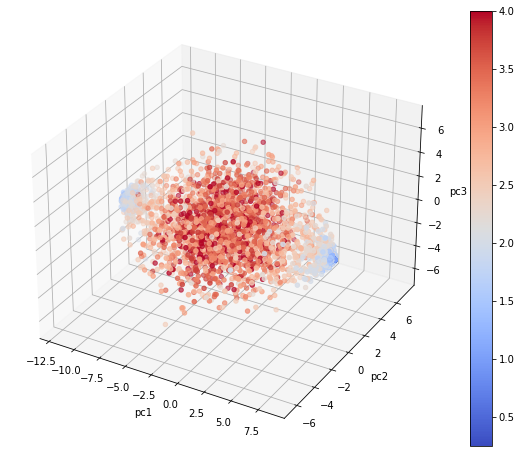

In [83]:
reducevec, vari = reduce_system(U,3)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(reducevec[:,0],reducevec[:,1], reducevec[:,2], c=t,cmap="coolwarm")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
fig.colorbar(scatter)


Q2(b)

In [84]:
import random
K = 3
print(reducevec)

[[ 3.11324412e+00 -5.01557622e-01  2.31839543e+00]
 [-1.97546687e+00 -1.55330354e+00 -1.15940737e+00]
 [-3.98984521e+00  1.19800430e+00 -3.31378779e+00]
 ...
 [ 8.38991232e+00 -6.95195284e-03 -5.27614401e-03]
 [ 8.38991232e+00 -6.95195284e-03 -5.27614401e-03]
 [ 8.38991232e+00 -6.95195284e-03 -5.27614401e-03]]


In [85]:
a = random.sample(range(0, len(reducevec)-1), K)
print(a)
Centroids = np.zeros((K,3))
print(Centroids)

[339, 545, 4703]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Text(0.5, 0, 'pc3')

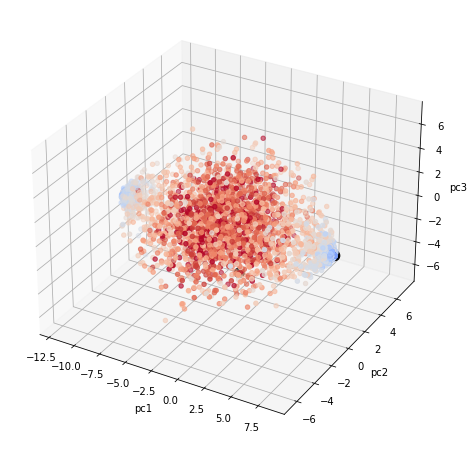

In [86]:
for i in range(K):
    Centroids[i,0] = reducevec[a[i], 0]
    Centroids[i,1] = reducevec[a[i], 1]
    Centroids[i,2] = reducevec[a[i], 2]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(reducevec[:,0],reducevec[:,1], reducevec[:,2], c=t,cmap="coolwarm")
scatter = ax.scatter(Centroids[:,0],Centroids[:,1], Centroids[:,2], c='black', s=100, cmap="coolwarm")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')    

In [87]:
reducevec = reducevec.tolist()
Centroids = Centroids.tolist()
principalComponents = pd.DataFrame(reducevec)
Centroids = pd.DataFrame(Centroids)
print(principalComponents)
print(Centroids)

             0         1         2
0     3.113244 -0.501558  2.318395
1    -1.975467 -1.553304 -1.159407
2    -3.989845  1.198004 -3.313788
3    -2.389187  3.466549  1.175701
4    -2.369332 -0.599262 -0.154364
...        ...       ...       ...
4795  8.389912 -0.006952 -0.005276
4796  8.389912 -0.006952 -0.005276
4797  8.389912 -0.006952 -0.005276
4798  8.389912 -0.006952 -0.005276
4799  8.389912 -0.006952 -0.005276

[4800 rows x 3 columns]
          0         1         2
0 -0.330714  1.960369 -0.806398
1  0.668577 -1.419480 -2.522542
2  8.389912 -0.006952 -0.005276


In [88]:
def K_mean(pc,K=3,jmax=10):
# step 1 - choose 3 clusters at random
# step 2 - select random point as centroids
    a = random.sample(range(0, len(pc)-1), K)
    Centroids = np.zeros((K,3))
    #print(a)
    for i in range(K):
      Centroids[i,0] = pc[a[i]][0]
      Centroids[i,1] = pc[a[i]][1]
      Centroids[i,2] = pc[a[i]][2]
    diff = 1
    j = 0
    Centroids = pd.DataFrame(Centroids)
    Centroids.columns = ['pc1','pc2', 'pc3']
    principalComponents = pd.DataFrame(pc)
    principalComponents.columns = ['pc1','pc2', 'pc3']
    while (diff!=0):
        XD = principalComponents
        i = 1
# step 3 - assign all the points to the closest cluster centroid
        for index1,row_c in Centroids.iterrows():
            ED = []
            for index2,row_d in XD.iterrows():
                d1 = (row_c["pc1"] - row_d["pc1"])**2
                d2 = (row_c["pc2"] - row_d["pc2"])**2
                d3 = (row_c["pc3"] - row_d["pc3"])**2
                d = np.sqrt(d1+d2+d3)
                ED.append(d)
            principalComponents[i] = ED
            i = i + 1

        C=[]
        for index,row in principalComponents.iterrows():
            min_dist = row[1]
            pos = 1
            for i in range(K):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos = i + 1
            C.append(pos)
        principalComponents["Cluster"]=C
# step 4 - recomput centroids of newly formed clusters
        Centroids_new = principalComponents.groupby(["Cluster"]).mean()[["pc2","pc1","pc3"]]
# step 5 - repeat 3 and 4
        if j == 0:
            diff = 1
            j = j+1
        elif j<jmax:
            diff = ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum()+((Centroids_new['pc3']-Centroids['pc3'])**2).sum()
            print(diff.sum())
            j = j+1
        else:
          diff = ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum()+((Centroids_new['pc3']-Centroids['pc3'])**2).sum()
          print('force exit with diff=', diff.sum())
          diff=0
        Centroids = principalComponents.groupby(["Cluster"]).mean()[["pc2","pc1","pc3"]]
    return principalComponents, Centroids

In [89]:
principalComponents, Centroids=K_mean(reducevec,3)

12.840409449862307
3.363995150039493
0.6174493340316017
0.09760748032613688
0.021693709743682434
0.005473812646880765
0.0


Text(0.5, 0, 'pc3')

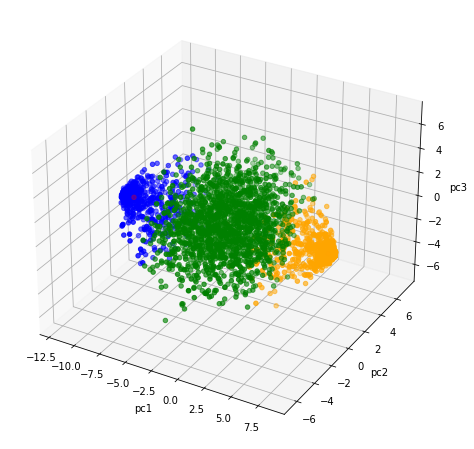

In [90]:
color=['green','orange','blue']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')  
for k in range(K):
    data=principalComponents[principalComponents["Cluster"]==k+1]
    scatter = ax.scatter(data["pc1"],data["pc2"], data["pc3"], c=color[k])
scatter = ax.scatter(Centroids["pc1"],Centroids["pc2"], Centroids["pc3"], c='red')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

Q2(c)

In [91]:
pc1 = U[:,0]
pc1 = np.array(pc1)
pc1 = pc1.reshape(10,10)
print(pc1)

[[-0.09970805  0.10016779 -0.1005941   0.09968319 -0.10142393  0.10129909
  -0.10046207  0.09941688 -0.09939594  0.0991085 ]
 [ 0.09943131 -0.09972029  0.10086507 -0.10088395  0.10123553 -0.10020204
   0.09910943 -0.0993453   0.09973552 -0.0997695 ]
 [-0.1001451   0.09990185 -0.10084233  0.09975955 -0.10126596  0.0997309
  -0.1000772   0.09928589 -0.09968053  0.09968722]
 [ 0.10063328 -0.09997295  0.09932929 -0.10067232  0.10050173 -0.09965632
   0.10048436 -0.10034118  0.10102516 -0.10002742]
 [-0.09974932  0.09994067 -0.09967311  0.1007177  -0.10016775  0.09964819
  -0.09865801  0.09950285 -0.1008399   0.09955355]
 [ 0.10036148 -0.10028584  0.09966207 -0.10033817  0.09953441 -0.09924771
   0.09960793 -0.0994993   0.10011643 -0.10015093]
 [-0.10166835  0.09996652 -0.10106033  0.10084798 -0.10016033  0.10017646
  -0.09962438  0.09941658 -0.10095986  0.1006075 ]
 [ 0.10017053 -0.10037841  0.10061265 -0.10053267  0.10028162 -0.09931443
   0.09900802 -0.0994894   0.10031904 -0.10088332]
 

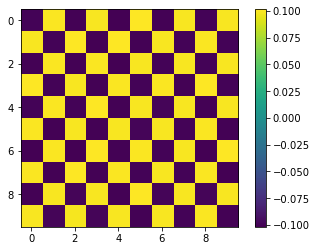

In [92]:
fig, ax = plt.subplots()
heatmap = ax.imshow(pc1)
fig.colorbar(heatmap)
plt.show()

From the graph above we can see that the yellow box represent the lattice is in spin up state, and the purple box represent the lattice is in spin down state.

In [93]:
pc2 = U[:,1]
pc2 = np.array(pc2)
pc2 = pc2.reshape(10,10)
print(pc2)

[[ 0.02300846  0.05380249 -0.11855936  0.16972346 -0.17474684  0.13761022
  -0.0563899  -0.01645869  0.09385991 -0.08308071]
 [-0.03819505 -0.02656449  0.10163866 -0.16248026  0.16506917 -0.11954572
   0.02439117  0.04272976 -0.09766621  0.10120316]
 [ 0.06381414  0.01686581 -0.06381945  0.10595862 -0.12077942  0.06987455
  -0.00151665 -0.08340789  0.13239246 -0.11961054]
 [-0.086325    0.03381318  0.03992331 -0.07285544  0.04740051 -0.0185369
  -0.05855308  0.12187769 -0.15387794  0.13278752]
 [ 0.12338824 -0.05546565 -0.01472182  0.05173311 -0.02780743 -0.02330965
   0.09790154 -0.14563619  0.18451995 -0.1616517 ]
 [-0.08878316  0.03644501  0.0268686  -0.06885001  0.04206838  0.01237744
  -0.09195912  0.16388674 -0.1720829   0.14848423]
 [ 0.07661278 -0.00375115 -0.06243576  0.09340218 -0.08121564  0.00643688
   0.06268377 -0.12594012  0.15090924 -0.13406884]
 [-0.06182855 -0.0314755   0.11425324 -0.13230802  0.12601279 -0.05094454
  -0.02578293  0.06896496 -0.09969653  0.08367089]
 

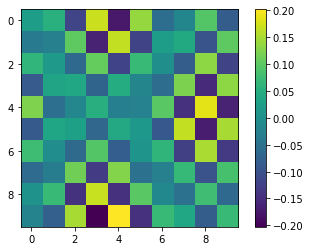

In [94]:
fig, ax = plt.subplots()
heatmap = ax.imshow(pc2)
fig.colorbar(heatmap)
plt.show()